# Implementing Panel Data Model

Panel data regression is a powerful way to control dependencies of unobserved, independent variables on a dependent variable, which canlead to biased estimators in traditional linear regression models. In this notebook, we share how to build a panel data regression model with *Python* in a step-by-step manner.

**What is Panel Data?**
*Panel data is a two-dimensional concept, where the same individuals are observered repeatedly over different periods in time.*

In general, panal data can be seen as a combination of cross-sectional and time-series data. Cross-sectional data is described as one observation of multiple objects and corresponding variables at a specific point in time (i.e. an observation is taken once). Time-series data only observes one object recurrently over time. Panel data comprises characteristics of both into one model by collecting data from multiple, same objects over time.

In a nutshell, we can think of it like a timeline in which we **periodically observe the same individuals**.

![panel_data](images/panel_data.png)

Note: It is often people mixed up data concept, namely **pooled-cross-sections**. While both can be seen as summarized cross-sectional data over time, the main difference is that panel data always observes the same individuals, while this cannot be proven in pooled-cross-sections.

## Panel Data Regression:

Now we understand what panel data is. But what is the meaning behind this data concept and why should we use it?

The answer is ... **heterogeneity and resulting endogeneity**. Maybe you already heard about this issue in traditional linear regression models, in which heterogeneity often leads to biased results. Panel data is able to deal with that problem. 

*The unobserved dependency of other independent variable(s) is called unobserved heterogeneity and the correlation between the independent variable(s) and the error term (i.e. the unobserved independent variabels) is called endogeneity.*

Let's suppose we want to analyze the relationship on how *coffee consumption* affects the *level of concentration*. A simple linear regression model would look like this:

$$concentration_i = \beta_0 + \beta_1 (coffee_i) + \epsilon_1$$

where:

- concentration level is the dependent variable
- $\beta_0$ is the estimated intercept coefficient
- $\beta_1$ is the estimated slope coefficient
- coffee consumption is the independent variable
- $\epsilon$ is the error term

The goal of this model is to explore the relationship of *coffee consumption* on the *concentraction level*. Assuming they are positively correlated ($\beta_1$ > 0), this would mean that if consuming more coffee, concentration level would increase.

But, what if there is another variable that would affect existing concentration level and is not included in the model? For example, *tiredness* has a high chance to affect *coffee consumption* (if you are tired, you will obviously drink coffee). If you remember the first sentence of this article, such variables are called unobserved, independent variables. They are "hidden" behind the error term and if, e.g., *coffee consumption* is positively correlated to such a variable, the error term would increase as *coffee consumption* increases.

This, in turn, would lead to an over increased estimator of the concentration level. Therefore, the estimated concentration level is biased and will lead to inaccurate inferences. 

Luckily, there is a way to deal with this problem using **panel data regression**. The advantage of panel data is that we cannot control **heterogeneity** in the linear regression model by acknowledge heterogeneity as **fix** or **random**.

**Panel Data Regression:**

$$y_{it} = \beta x_{it} + \alpha_i + \mu_{it}$$

for $t = 1, 2, 3, ..., T$ and $i = 1, 2, 3, ..., N$

where:

- $y$ is the dependent variable
- $x$ is the independet variable(s)
- $\beta$ is the estimated coefficient(s)
- $\alpha$ is the individual effects
- $\mu$ is the idiosyncratic error

## Different Regression Models for Pandel Data:

Generally speaking, there are three types of regression for panel data:

**1) PooledOLS:** PooledOLS can be described as simple OLS (Ordinary Least Squared) model that is performed on panel data. It ignores time and individual characteristics and focuses only on dependencies between the individuals. However, simple OLS requires that there is no correlation between unobserved and independent variable(s).

$$cov(x_{it}, \alpha_i) = 0$$

The problem with PooledOLS is that even the assumption above holds true, $\alpha$ might have a serial correlation over time. Consequentely, PooledOLS is mostly inappropriate for panel data.

$$cov(\alpha_i, \alpha_i) = var(\alpha_i) = \sigma_{\alpha}^2 > 0$$

Note: To counter this problem, there is another regression model called *FGLS (Feasible Generalized Least Squares)*, which is also used in random effects models.

**2) Fixed-Effects (FE) Model:** The FE-model determines individual effects of unobserved, independent variables as constant ("fix") over time. Within FE-models, the relationship between unobserved, independent variables and the independent variables (i.e. endogeneity) can be existent.

The trick in a FE-model is that if we assume $\alpha$ as constant and subtract the mean values from each equation term, $\alpha$ (i.e. the unobserved heterogeneity) will get zero and can therefore be neglected.

$$y_{it} - \bar{y}_i = \beta (x_{it} - \bar{x}_i) + (\alpha_i - \alpha_i) + (\mu_{it} - \bar{\mu}_i)$$

$$y_{it} - \bar{y}_i = \beta (x_{it} - \bar{x}_i) + (\mu_{it} - \bar{\mu}_i)$$

Solely, the idiosyncratic error (represented by unobserved factors that change over time and across units) remains and has to be exogen and non-collinear.

However, because heterogeneity can be controlled, this model allows heterogeneity to be existent within the model. Unfortunately, due to the fact that individual effects are fixed, dependencies can only be observed within the individuals.

Note: An alternative to the FE-model is the *LSDV-model (Least SquaresDummy Variables)*, in which the (fixed) individual effects are representedby dummy variables. This model will lead to the exact same results, but has a main disadvantage, since it will need a lot more computation power if the regression model is big.

**3) Random-Effects (RE) Model:** RE-models determine individual effects of unobserved, independent variables as random variables over time. They are able to "switch" between OLS and FE and hence, can focus on both, dependencies between and within individuals. Using the same notation as above:

$$y_{it} = \beta x_{it} + \alpha_i + \mu_{it}$$

for $t = 1, 2, 3, ..., T$ and $i = 1, 2, 3, ..., N$

In order to include between- as well as within-estimators, we first need to define, when to use which estimator. In general, if the covariance between $\alpha$ and independent variables is zero (or very small), there is no correlation between them and an OLS-model is preferred. If that covariance is not zero, there is a relationship that should be eliminated by using the FE_model:

**OLS Model:**
$$cov(x_{it}, \alpha_i) = 0$$

**FE Model:**
$$cov(x_{it}, \alpha_i) \neq 0$$

The problem with using OLS, as stated above, is the serial correlation between $\alpha$ over time. Hence, RE-models determine which model to take according to the serial correlation of the error terms. To do so, the model uses the term $\lambda$. In short, $\lambda$ calculates how big the variance of $\alpha$ is. If it is zero, then there will be no variance of $\alpha$, which, in turn, means that PooledOLS is the preferred choice. On the other hand, if the variance of $\alpha$ tend to become very big, $\lambda$ tends to become one and therefore it might make sense to eliminate $\alpha$ and go with the FE-model.

$$\lambda = 1 - \frac{\sigma_{\mu}^2}{\sigma_{\mu}^2 + T \sigma_{\alpha}^2}$$

## Model Selection:

**How to decide which model is appropriate?**

Choosing between PooledOLS and FE/RE: Basically, there are five assumptions for simple linear regression models that must be fulfilled. Two of them can help us in choosing between PooledOLS and FE/RE.

These assumptions are (1) Linearity, (2) Exogeneity, (3a) Homoskedasticityand (3b) Non-autocorrelation, (4) Independent variables are not Stochastic, and (5) No Multicolinearity.

If assumption (2) or (3) (or both) are violated, then FE or RE should be more suitable.

Choosing between FE and RE: This depends on our assumption, if the individual, unobserved heterogeneity is a constant or random effect. But this question can also be answered by perfoming the Hausman-Test.

**Hausman-Test:**

In simple terms, the Hausman-Test is a test of endogeneity. By running the Hausman-Test, the null hypothesis is that the covariance between independent variables and $\alpha$ is zero. If this is the case, then RE is preferred over FE. If the null hypothesis is not true, we must go with the FE-model. 

So, we now understand the theoretics behind panel data regression. Let's start building the model in Python step-by-step:

## How does the income affects crime rate?

We will use the *Guns* dataset, which is normally provided in R. As stated in the description of this dataset, *Guns* is a **balanced** panel of data on 50 US states, plus the district of Columbia (for a total of 51 states), by year for 1977 - 1999.

Note: A panel dataset is called "*balanced*" if there are no missing values within the dataset, otherwise, it would be called "*unbalanced*"

For terms of simplicity, we only use the following columns provided by the dataset:

- *State*: This column represents the individual observation
- *Year*: The column Year documents our periodically collected data (between 1977 - 1999)
- *Income*: Income is the independent variable and is represented as the per capita personal income.
- *Violent*: Violent is our dependent variable and includes violent crime rates (incidents (incidents / 100000 inhabitants)

### Step 1: Import dataset and transform it into the right format

In [3]:
# Import modules
import pandas as pd
from linearmodels import PanelOLS
import statsmodels.formula.api as smf

In [6]:
# Import the 'Guns' dataset
guns = pd.read_csv("data/guns.csv", 
                   usecols = ['state', 'year', 'income', 'violent'],
                   index_col = ['state', 'year'])

In [7]:
# Create the year column
years = guns.index.get_level_values('year').to_list()
guns['year'] = pd.Categorical(years)

### Step 2: Start with PooledOLS and check required assumptions

We would recommend to start performing PooledOLS. Since it can be seen as a simple OLS model, it has to fulfill certain assumptions. As stated above, if condition 2 or 3 (or both) are violated, then FE- / RE-model are likely more suitable. Since condition 2 can only be tested further down with the Hausman-Test, we will stick to proving condition 3 for now.

In [9]:
# Import modules
from linearmodels import PooledOLS
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [10]:
# Perform PooledOLS
exog = sm.tools.tools.add_constant(guns['income'])
endog = guns['violent']
reg = PooledOLS(endog, exog)
results = reg.fit(cov_type = 'clustered', cluster_entity = True)

In [11]:
# Store values for checking homoskedasticity graphically
fittedvals_OLS = results.predict().fitted_values
residuals_OLS = results.resids

Condition 3 is splitted in 3a (Homoskedasticity) and 3b (Non-Autocorrelation). Those assumptions can be tested with a number of different tests. For conditional 3a, we demonstrate how to identify heteroscedasticity graphically as well as perform the *White-Test* and *Breusch-Pagan-Test* (both are similar). For condition 3b, it will be tested using *Durbin-Watson-Test*.

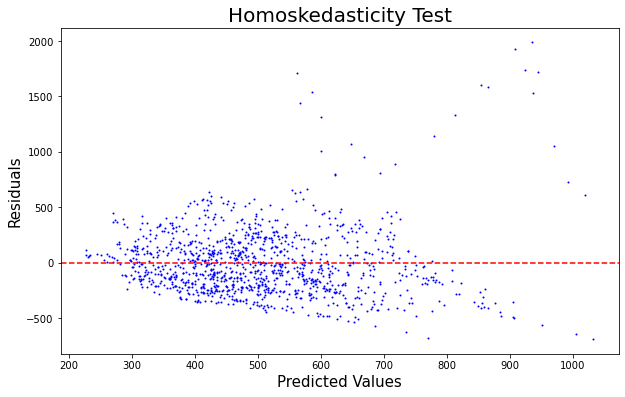

In [21]:
# Condition 3a Homoskedasticity
import matplotlib.pyplot as plt

# Residual-Plot for growing variance detection
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(fittedvals_OLS, residuals_OLS, color = 'blue', s = 1)
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicted Values', fontsize = 15)
ax.set_ylabel('Residuals', fontsize = 15)
ax.set_title('Homoskedasticity Test', fontsize = 20)
plt.show()
plt.savefig('images/homoskedasticity.png')
plt.close()

Basically, a residuals-plot represents predicted values (x-axis) vs. residuals(y-axis). If the plotted data points spread out, this is an indicator for growing variance and thus, for heteroskedasticity. Since this seems to be the case in our example, we might have the first violation. But let´s check this with the White- and the Breusch-Pagan-Test:

In [24]:
# Import module
from statsmodels.stats.diagnostic import het_white, het_breuschpagan

# White-Test
pooled_ols = pd.concat([guns, residuals_OLS], axis = 1)
pooled_ols = pooled_ols.drop(['year'], axis = 1).fillna(0)
exog = sm.tools.tools.add_constant(guns['income']).fillna(0)

# Perform White-Test
white_test = het_white(pooled_ols['residual'], exog)

# Print results
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val']
print(dict(zip(labels, white_test)))

{'LM-Stat': 200.15502156044568, 'LM p-val': 3.442621728588946e-44, 'F-Stat': 120.35903993735407, 'F p-val': 2.925453555717697e-48}


In [25]:
# Breusch-Pagan-Test
breusch_pagan_test = het_breuschpagan(pooled_ols['residual'], exog)

# Print results
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val']
print(dict(zip(labels, breusch_pagan_test)))

{'LM-Stat': 110.96166044221745, 'LM p-val': 6.032616972194349e-26, 'F-Stat': 122.34596392437228, 'F p-val': 4.048137598792713e-27}


Therefore, we have proven our first violation 3a.